In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

# load data
data = np.load("./data/heart_disease_data.npz") 

def ind_x_eq_val(x, val):
    return np.where(x==val)[0]

def count_x_eq_val(x, val):
    return len(ind_x_eq_val(x, val))/float(len(x))
    
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)

### QUESTION (b) 
####  **Non-parametric model** Compute empirical pmf, derive the conditional pmf, and estimate the MAP decision by the mode of posterior distribution $p_{\tilde{h} \mid \tilde{s},\tilde{c}}$. (The MAP estimates should be $\tilde{h}=0 \text{ or } 1$)

In [2]:
heart_disease = data['heart_disease']
sex = data['sex']
chest_pain = data['chest_pain']

# Estimate the pmf of H, i.e. P(H=0) and P(H=1)
P_H0 = count_x_eq_val(heart_disease, 0)
P_H1 = count_x_eq_val(heart_disease, 1)

# Estimate the conditional pmf of S given H, i.e. P(S|H=0) and P(S|H=1)
P_S_H0 = np.zeros(2)
P_S_H1 = np.zeros(2)
for ind_S in range(2):
    P_S_H0[ind_S] = count_x_eq_val(sex[ind_x_eq_val(heart_disease, 0)], ind_S)
    P_S_H1[ind_S] = count_x_eq_val(sex[ind_x_eq_val(heart_disease, 1)], ind_S)

# Estimate the conditional pmf of C given H, i.e. P(C|H=0) and P(C|H=1)
P_C_H0 = np.zeros(4)
P_C_H1 = np.zeros(4)
for ind_C in range(4):
    P_C_H0[ind_C] = count_x_eq_val(chest_pain[ind_x_eq_val(heart_disease, 0)], ind_C)
    P_C_H1[ind_C] = count_x_eq_val(chest_pain[ind_x_eq_val(heart_disease, 1)], ind_C)

# Calculate the MAP estimate
MAP_estimate_S_C = np.zeros((2,4))
for i in range(2):
    for j in range(4):
        if P_H0*P_S_H0[i]*P_C_H0[j] >= P_H1*P_S_H1[i]*P_C_H1[j]:
            MAP_estimate_S_C[i][j] = 0
        else:
            MAP_estimate_S_C[i][j] = 1


# Calculate the error rate - i.e. the proportion of all predictions that were incorrect
heart_disease_test = data['heart_disease_test']
sex_test = data['sex_test']
chest_pain_test = data['chest_pain_test']

prediction = np.zeros(50)
for i in range(50):
    prediction[i] = MAP_estimate_S_C[int(sex_test[i])][int(chest_pain_test[i])]
error_rate_S_C = np.sum(prediction != heart_disease_test)/50

print("Probability of error " + str(error_rate_S_C))

Probability of error 0.18


### QUESTION (d)
#### **Maximum likelihood estimates** Find the parameters of two normal distributions ($\tilde{x}|\tilde{h}=1$ and $\tilde{x}|\tilde{h}=0$) that maximize the likelihood functions.

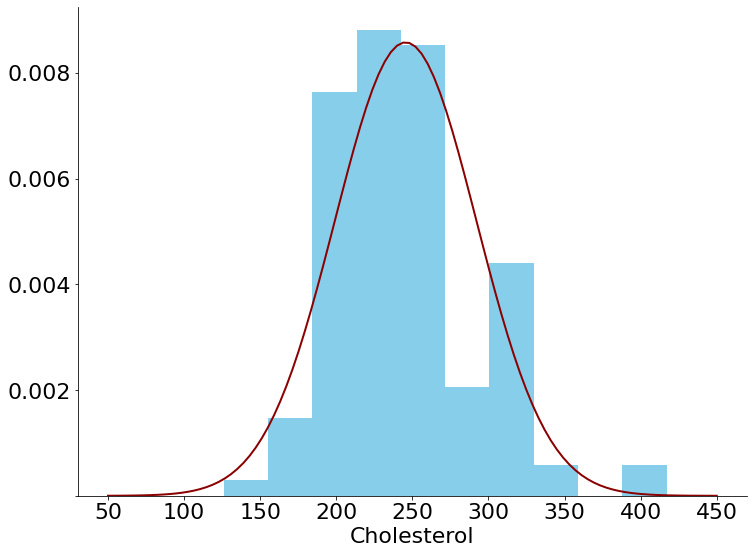

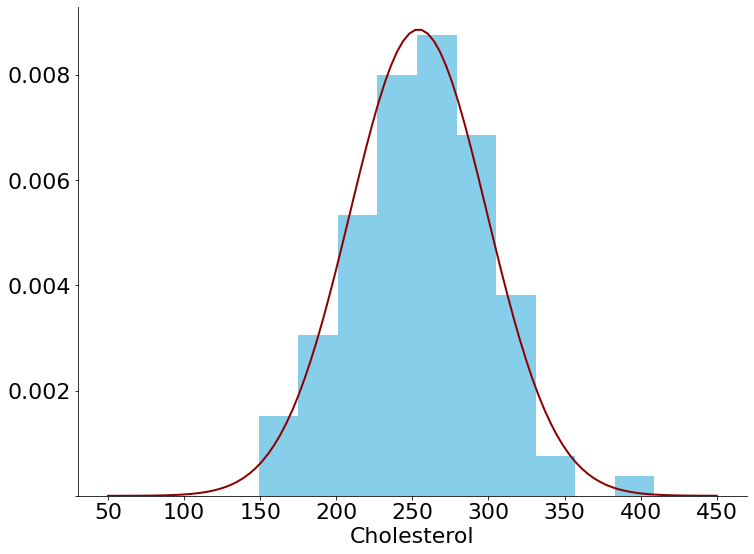

In [3]:
## Estimate MLE of X given H
cholesterol = data['cholesterol']
mean_X_H = np.zeros(2)
std_X_H = np.zeros(2)
mean_X_H[0]= np.mean(cholesterol[ind_x_eq_val(heart_disease, 0)])
std_X_H[0]  = np.std(cholesterol[ind_x_eq_val(heart_disease, 0)])
mean_X_H[1]=  np.mean(cholesterol[ind_x_eq_val(heart_disease, 1)])
std_X_H[1] =  np.std(cholesterol[ind_x_eq_val(heart_disease, 1)])

n_plot = 100
for i in range(2):
    plt.figure(figsize=(12, 9))  
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False) 
    plt.xticks(fontsize=22) 
    plt.yticks(fontsize=22) 
    plt.xlabel("Cholesterol", fontsize=22)  
    
    plt.hist(cholesterol[ind_x_eq_val(heart_disease, i)],
             bins = 10,density=True,edgecolor = "none", color="skyblue")
    
    plt.plot(np.linspace(50, 450, n_plot),gaussian(np.linspace(50, 450, n_plot), 
                     mean_X_H[i], std_X_H[i]), color="darkred", lw=2)

### QUESTION(e)

#### **MAP decision** compute posterior $p_{\tilde{h} \mid \tilde{s},\tilde{c}, \tilde{x}}$ and derive MAP

In [4]:
# Calculate the MAP estimate
def MAP_estimate_S_C_X(S,C,X):
    S = int(S)
    C = int(C)
    X = int(X)
    if P_H0*P_S_H0[S]*P_C_H0[C]*gaussian(X,mean_X_H[0],std_X_H[0]) >= \
                             P_H1*P_S_H1[S]*P_C_H1[C]*gaussian(X,mean_X_H[1],std_X_H[1]):
        MAP_estimate_S_C_X = 0
    else:
        MAP_estimate_S_C_X = 1
    return MAP_estimate_S_C_X
        
# Calculate the error rate
cholesterol_test = data['cholesterol_test']
prediction_with_X = np.zeros(50)
for i in range(50):
    prediction_with_X[i] = MAP_estimate_S_C_X(sex_test[i], chest_pain_test[i], cholesterol_test[i])
error_rate_S_C_X = np.sum(prediction_with_X != heart_disease_test)/50
print("Probability of error using cholesterol " + str(error_rate_S_C_X))

Probability of error using cholesterol 0.14
